In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('emnist-letters-train.csv')

In [33]:
X = np.array(df.iloc[:,1:].values)
y = np.array(df.iloc[:,0].values)

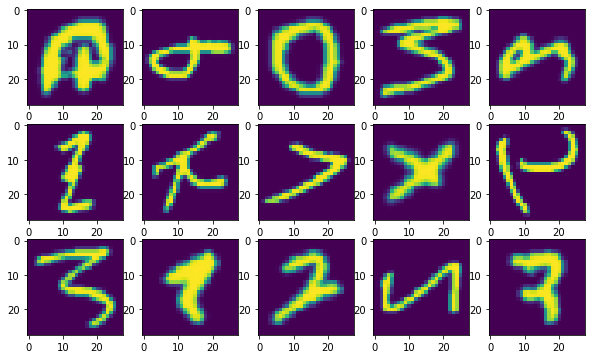

In [34]:
fig, ax = plt.subplots(3,5,figsize=(10,6))
for i,a in enumerate(ax.flat):
    a.imshow(X[i].reshape(28,28))

In [35]:
import tensorflow as tf
import keras

In [36]:
X = X/255.0

num_images = X.shape[0]
height = 28
width = 28

X = X.reshape(num_images,height,width,1)

In [37]:
num_of_classes = 37

y = tf.keras.utils.to_categorical(y,num_of_classes)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(input_shape=(28,28,1)),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(num_of_classes,activation='softmax')])

In [41]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1943/1943 [==============================] - 61s 32ms/step - loss: 0.4075 - accuracy: 0.8694 - val_loss: 0.3560 - val_accuracy: 0.8845
Epoch 2/10
1943/1943 [==============================] - 58s 30ms/step - loss: 0.2625 - accuracy: 0.9131 - val_loss: 0.3109 - val_accuracy: 0.8974
Epoch 3/10
1943/1943 [==============================] - 62s 32ms/step - loss: 0.2021 - accuracy: 0.9321 - val_loss: 0.3283 - val_accuracy: 0.9029
Epoch 4/10
1943/1943 [==============================] - 64s 33ms/step - loss: 0.1691 - accuracy: 0.9422 - val_loss: 0.3657 - val_accuracy: 0.8981
Epoch 5/10
1943/1943 [==============================] - 65s 33ms/step - loss: 0.1472 - accuracy: 0.9487 - val_loss: 0.4610 - val_accuracy: 0.9014
Epoch 6/10
1943/1943 [==============================] - 62s 32ms/step - loss: 0.1368 - accuracy: 0.9526 - val_loss: 0.5022 - val_accuracy: 0.8914
Epoch 7/10
1943/1943 [==============================] - 64s 33ms/step - loss: 0.1286 - accuracy: 0.9555 - val_loss: 0.7632 -

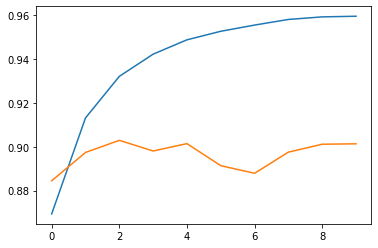

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()